## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import oracledb
from wordcloud import WordCloud

## Class Definitions

In [7]:
class ReviewAnalyzer:
    def __init__(self, db_user, db_password, dsn):
        self.db_user = db_user
        self.db_password = db_password
        self.dsn = dsn
        self.conn = None
        self.df = None

    def connect_db(self):
        try:
            self.conn = oracledb.connect(
                user=self.db_user,
                password=self.db_password,
                dsn=self.dsn
            )
            print("✅ Database connection successful.")
        except Exception as e:
            print(f"❌ Error connecting to database: {e}")

    def load_data(self):
        try:
            query = """
            SELECT b.name AS bank, r.review_text, r.rating, r.review_date,
                r.sentiment_label, r.sentiment_score, r.theme
            FROM reviews r
            JOIN banks b ON r.bank_id = b.id
            """
            self.df = pd.read_sql(query, self.conn)

            # Normalize column names
            self.df.columns = self.df.columns.str.lower()

            print(f"✅ Loaded {len(self.df)} rows.")
        except Exception as e:
            print(f"❌ Error loading data: {e}")

    def plot_sentiment_distribution(self):
        if self.df is None:
            print("⚠️ Data not loaded.")
            return

        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, x='bank', hue='sentiment_label', palette='Set2')
        plt.title('Sentiment Distribution by Bank')
        plt.xlabel('Bank')
        plt.ylabel('Number of Reviews')
        plt.legend(title='Sentiment')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
    def plot_theme_frequencies(self):
        if self.df is None:
            print("⚠️ Data not loaded.")
            return
        
        # Normalize theme: split multiple themes by comma
        exploded_df = self.df.copy()
        exploded_df['theme'] = exploded_df['theme'].fillna("Unknown")
        exploded_df['theme'] = exploded_df['theme'].str.split(',\s*')
        exploded_df = exploded_df.explode('theme')
        exploded_df['theme'] = exploded_df['theme'].str.strip()

        # Plot per bank
        banks = exploded_df['bank'].unique()
        for bank in banks:
            plt.figure(figsize=(10, 6))
            bank_data = exploded_df[exploded_df['bank'] == bank]
            top_themes = bank_data['theme'].value_counts().head(10)

            sns.barplot(
                x=top_themes.values,
                y=top_themes.index,
                palette="Blues_r"
            )
            plt.title(f"Top 10 Themes - {bank}")
            plt.xlabel("Number of Reviews")
            plt.ylabel("Theme")
            plt.tight_layout()
            plt.show()
    

<>:60: SyntaxWarning: invalid escape sequence '\s'
<>:60: SyntaxWarning: invalid escape sequence '\s'
C:\Users\abdulkerima\AppData\Local\Temp\ipykernel_5948\155151592.py:60: SyntaxWarning: invalid escape sequence '\s'
  exploded_df['theme'] = exploded_df['theme'].str.split(',\s*')


## Analyze the datas

✅ Database connection successful.
✅ Loaded 1200 rows.


C:\Users\abdulkerima\AppData\Local\Temp\ipykernel_5948\155151592.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  self.df = pd.read_sql(query, self.conn)


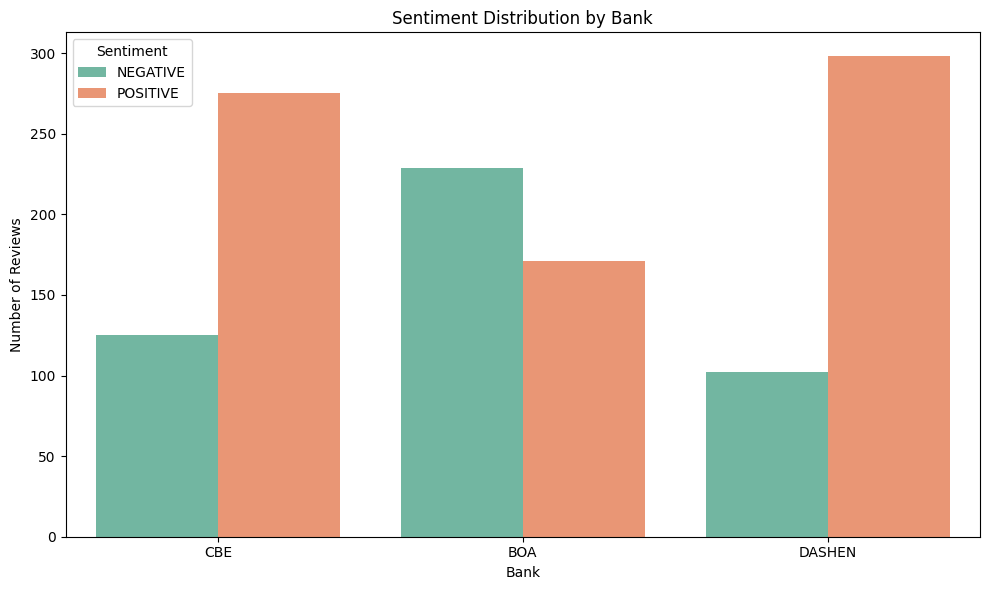

C:\Users\abdulkerima\AppData\Local\Temp\ipykernel_5948\155151592.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


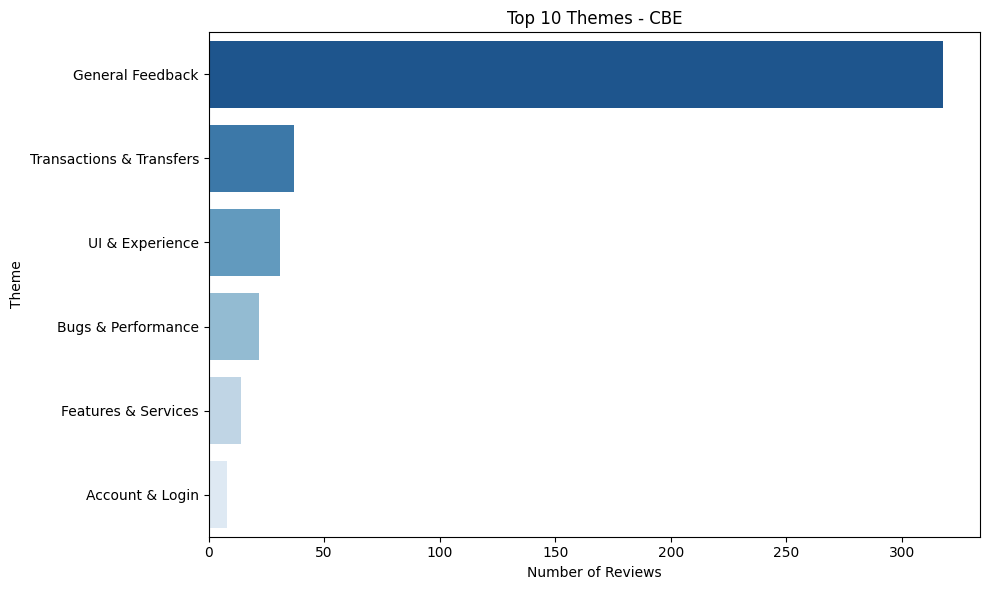

C:\Users\abdulkerima\AppData\Local\Temp\ipykernel_5948\155151592.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


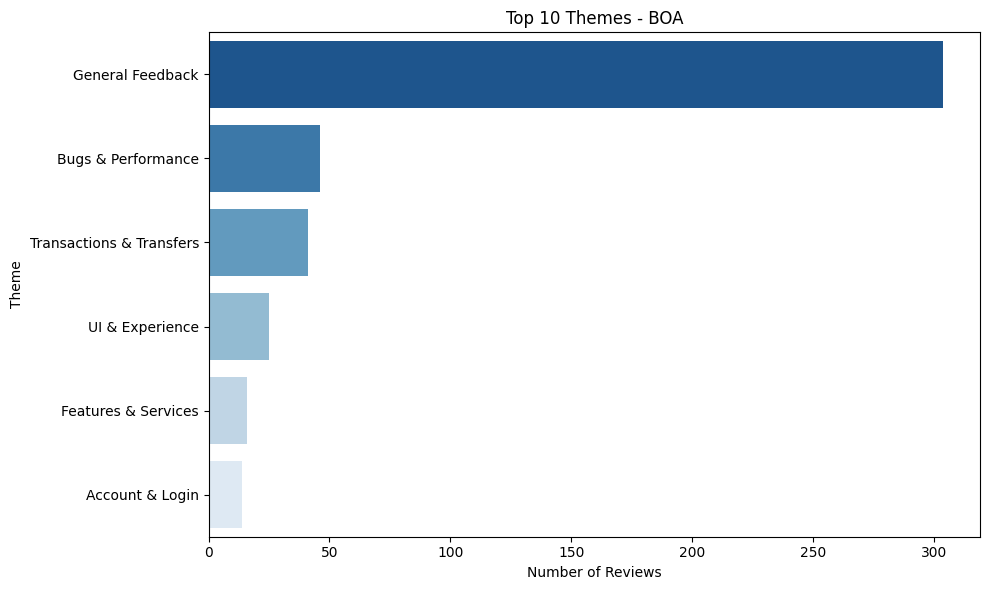

C:\Users\abdulkerima\AppData\Local\Temp\ipykernel_5948\155151592.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


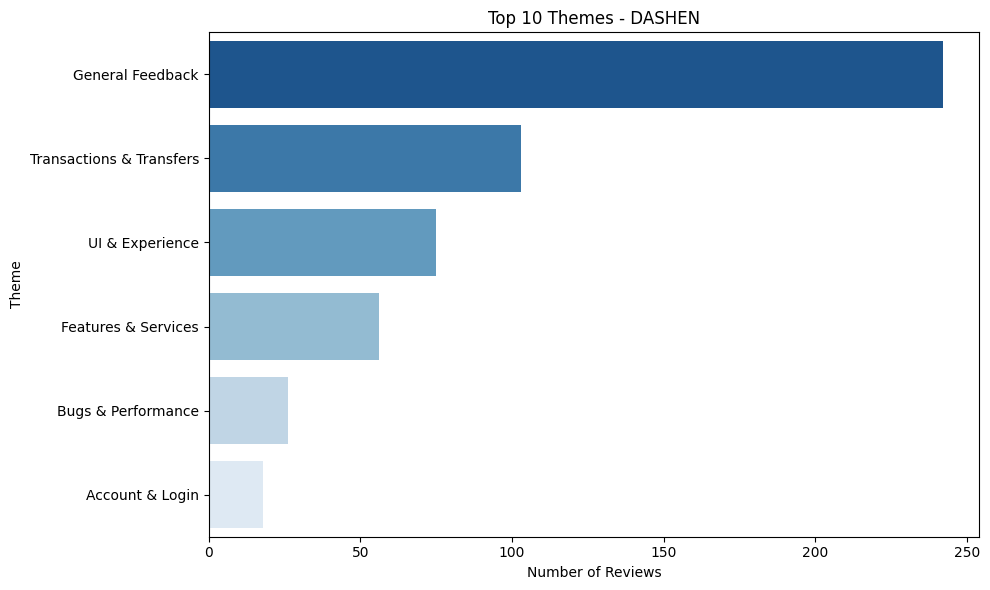

In [8]:
analyzer = ReviewAnalyzer(
    db_user="bank_reviews",
    db_password="bank_reviews",
    dsn="localhost/XEPDB1"
)

analyzer.connect_db()
analyzer.load_data()
analyzer.plot_sentiment_distribution()
analyzer.plot_theme_frequencies()